In [1]:
"""
社畜丼toot集計NB
神野さん作のSQLiteDBファイル(https://1drv.ms/u/s!AgFTqyL78d4kctd9_JunKFU-qRs)を
使用しています
"""

import sqlite3
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [2]:
col_id = 'inner_id'
col_username = 'username'
col_toot = 'toot'

# username毎に集計しreindex
con = sqlite3.connect('tootData.db')
c = con.cursor()
df_raw = pd.io.sql.read_sql_query(f'select {col_username}, {col_toot} from toots', con)
c.close()
con.close()

# username毎に集計しreindex
toot_count = df_raw[col_username].value_counts()
df_toot_count = pd.DataFrame({
    col_username: toot_count.index,
    col_toot: toot_count.values
})

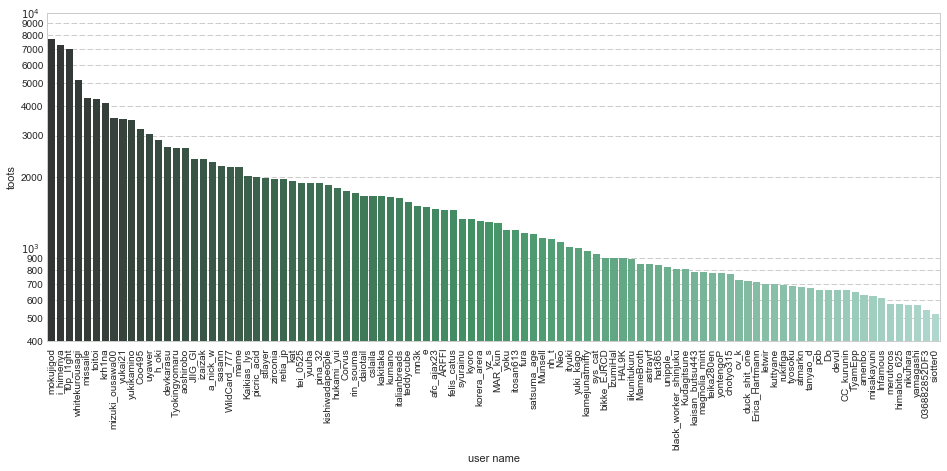

In [3]:
# plot
f, ax = plt.subplots(figsize=(16, 12))
f.subplots_adjust(bottom = 0.5)

dat = df_toot_count[0:100]
ax.set_xticklabels(dat.index, rotation=90)
ax.set_yscale("log")
ax.grid(which='both')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%i"))
ax.set_ylim(top=10**4, bottom=400)
sns.barplot(x=dat[col_username], y=dat[col_toot], palette='BuGn_d')

ax.set_ylabel('toots')
ax.set_xlabel('user name')

f.savefig('out.svg')